In [2]:
import os
import cv2
import glob
import matplotlib.pylab as plt
import numpy as np

In [7]:
DIR_ENHANCEMENT = '/Users/xie/Code/paleontology_fossil_ocr/data/preprocess_data/image_enhancement/*'

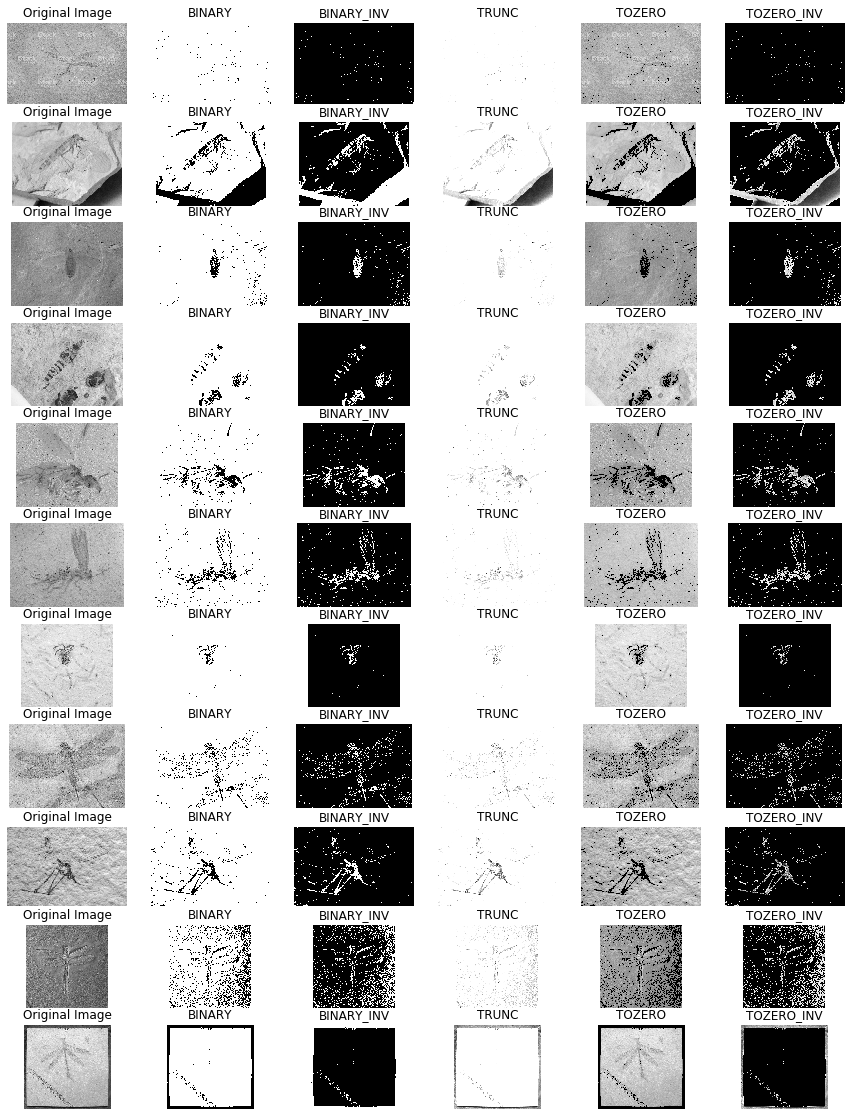

In [32]:
# simple image binarization
image_list = glob.glob(DIR_ENHANCEMENT)
style_list = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
title = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

nb_rows, nb_cols = len(image_list), 6
plt.figure(figsize=(15, 20))

ret_list = []
for image in image_list:
    img = cv2.imread(image, 0)
    ret_list.append(img)
    for style in style_list:
        ret_list.append(cv2.threshold(img, 127, 255, style)[1])

for i in range(nb_rows * nb_cols):
    plt.subplot(nb_rows, nb_cols, i + 1)
    plt.imshow(ret_list[i], 'gray')
    plt.axis('off')
    plt.title(title[i % nb_cols])

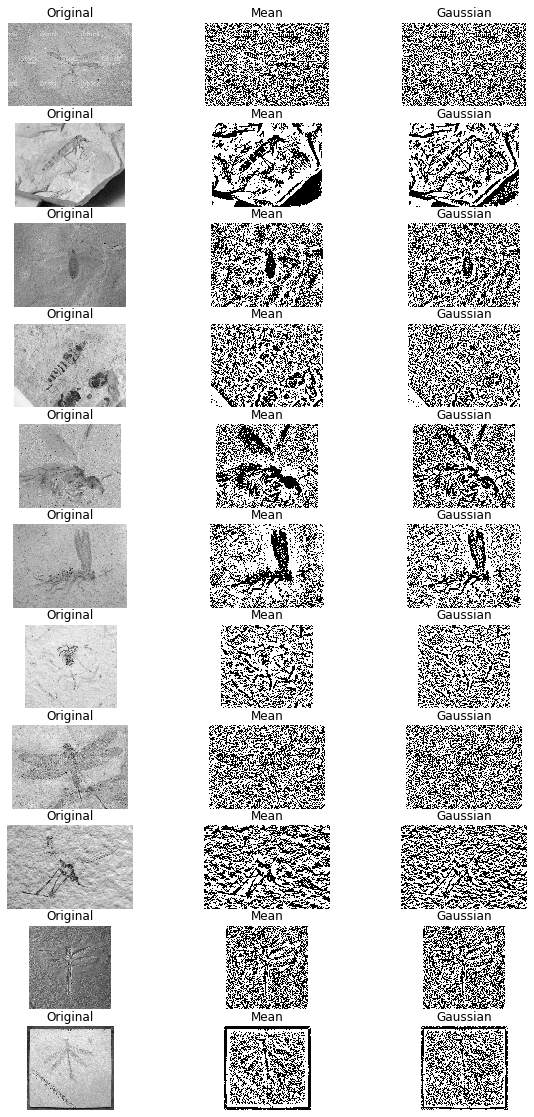

In [46]:
# image adaptive binarization
nb_rows, nb_cols = len(image_list), 3
plt.figure(figsize=(10, 20))

adaptive_method = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
title = ['Original', 'Mean', 'Gaussian']

ret_list = []
for image in image_list:
    img = cv2.imread(image, 0)
    ret_list.append(img)
    for method in adaptive_method:
        ret_list.append(cv2.adaptiveThreshold(img, 255, method, cv2.THRESH_BINARY, 101, 2))

for i in range(nb_rows * nb_cols):
    plt.subplot(nb_rows, nb_cols, i + 1)
    plt.imshow(ret_list[i], 'gray')
    plt.axis('off')
    plt.title(title[i % nb_cols])


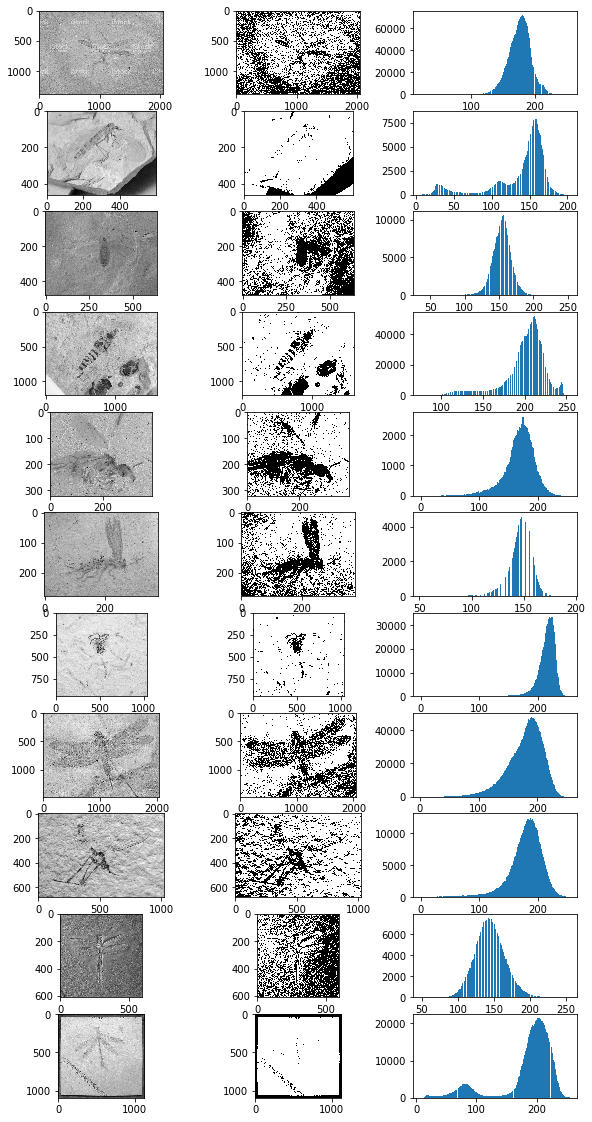

In [61]:
# Otsu’s binarization
nb_rows, nb_cols = len(image_list), 3
plt.figure(figsize=(10, 20))

for index, image in enumerate(image_list):
    img = cv2.imread(image, 0)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 1)
    plt.imshow(img, 'gray')
    
    ostu_img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 2)
    plt.imshow(ostu_img, 'gray')
    
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 3)
    plt.hist(img.ravel(), 256)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


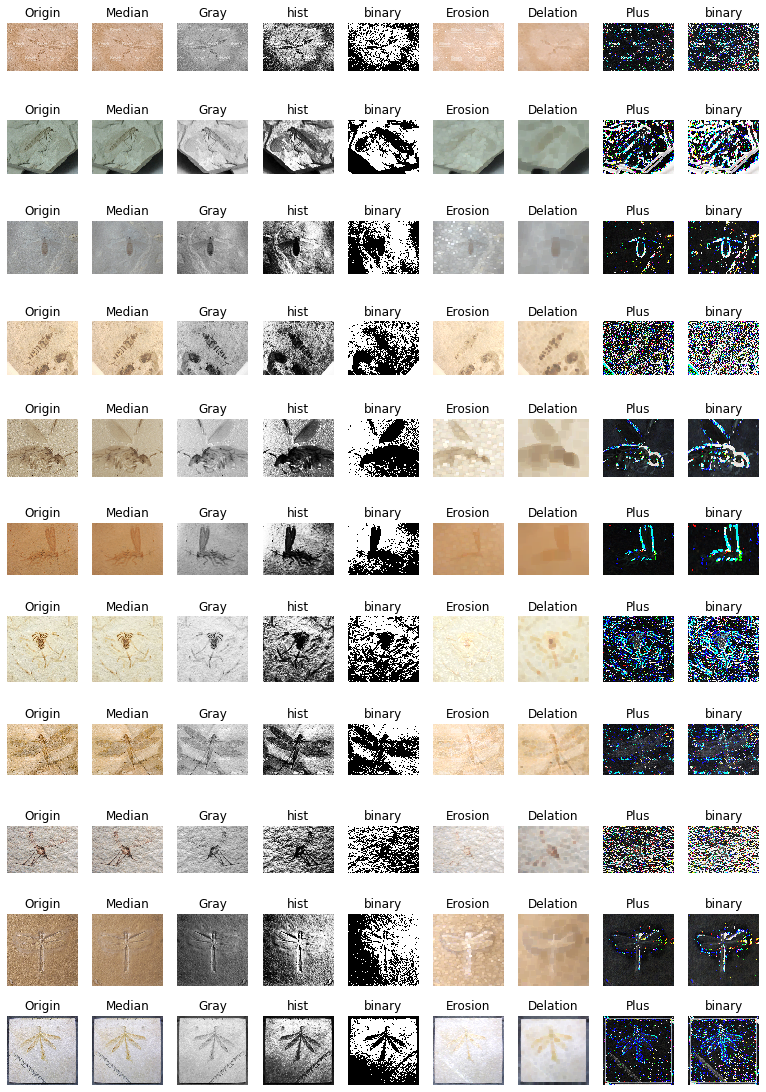

In [93]:
# multi cv2 image preprocess
# by: https://blog.csdn.net/wsh596823919/article/details/79982485
nb_rows, nb_cols = len(image_list), 10
plt.figure(figsize=(15, 20))

for index, image in enumerate(image_list):
    img = cv2.imread(image)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 1)
    plt.imshow(img[...,::-1])
    plt.title('Origin')
    plt.axis('off')
    
    median = cv2.medianBlur(img, 5)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 2)
    plt.imshow(median[...,::-1])
    plt.title('Median')
    plt.axis('off')
    
    gray_img = cv2.cvtColor(median, cv2.COLOR_RGB2GRAY)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 3)
    plt.imshow(gray_img[...,::-1], 'gray')
    plt.title('Gray')
    plt.axis('off')
    
    hist = cv2.equalizeHist(gray_img)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 4)
    plt.imshow(hist[...,::-1], 'gray')
    plt.title('hist')
    plt.axis('off')
    
    ret, binary = cv2.threshold(hist, 140, 255,cv2.THRESH_BINARY)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 5)
    plt.imshow(binary[...,::-1], 'gray')
    plt.title('binary')
    plt.axis('off')
    
    kernel1= cv2.getStructuringElement(cv2.MORPH_RECT, (20,14))    
    iFushi = cv2.morphologyEx(img,cv2.MORPH_DILATE, kernel1)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 6)
    plt.imshow(iFushi[...,::-1], 'gray')
    plt.title('Erosion')
    plt.axis('off')
    
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
    iPengzhang = cv2.morphologyEx(iFushi, cv2.MORPH_ERODE, kernel2)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 7)
    plt.imshow(iPengzhang[...,::-1], 'gray')
    plt.title('Delation')
    plt.axis('off')
    
    jian = np.abs(iPengzhang - img)
    jian = cv2.medianBlur(jian, 5)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 8)
    plt.imshow(jian[...,::-1], 'gray')
    plt.title('Plus')
    plt.axis('off')

    
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 6))
    iWenzi = cv2.morphologyEx(jian, cv2.MORPH_DILATE, kernel3)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 9)
    plt.imshow(iWenzi[...,::-1], 'gray')
    plt.title('Final')
    plt.axis('off')
    
    ret, binary = cv2.threshold(iWenzi, 140, 255,cv2.THRESH_BINARY)
    plt.subplot(nb_rows, nb_cols, index * nb_cols + 9)
    plt.imshow(binary[...,::-1], 'gray')
    plt.title('binary')
    plt.axis('off')

plt.savefig('process.jpg')
    

In [1]:
nb_rows, nb_cols = 1, 2
plt.figure(figsize=(15, 15))

img_path = '/Users/xie/Code/paleontology_fossil_ocr/data/preprocess_data/image_enhancement/270.jpg'

plt.subplot(nb_rows, nb_cols, 1)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_RGB2GRAY)
cv2.imshow('image', img)
plt.imshow(img[..., ::-1])
plt.subplot(nb_rows, nb_cols, 2)
plt.hist(img.ravel(), 256)

NameError: name 'plt' is not defined